In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [38]:
def simulate_random_walk(probability_right, num_steps, initial_position=0):
    """
    Simulate a random walk.

    Parameters:
    - probability_right (float): The probability of taking a step to the right.
                                The probability of a step to the left is 1 - probability_right.
    - num_steps (int): Number of steps in the random walk.
    - initial_position (int, optional): The starting position of the random walk. Default is 0.

    Returns:
    - numpy.ndarray: An array containing the positions at each step of the random walk.
    """
    steps = np.random.choice([-1, 1], size=num_steps, p=[1 - probability_right, probability_right])
    positions = np.cumsum(steps)

    return positions

In [45]:
def plot_random_walk_trajectories_and_stats(probability, num_steps, initial_position, num_simulations):
    """
    Simulate multiple random walks and plot trajectories along with mean and standard deviation functions.

    Parameters:
    - probability (float): Probability of a step being positive in the random walk.
    - num_steps (int): Number of steps in each random walk.
    - initial_position (float): Starting position for the random walk.
    - num_simulations (int): Number of simulations to run.

    Returns:
    None
    """

    # Simulate random walks
    simulations = []
    for _ in range(num_simulations):
        simulation_result = simulate_random_walk(probability, num_steps, initial_position)
        simulations.append(simulation_result)
    
    # Calculate mean and standard deviation functions
    mean_function = np.mean(simulations, axis=0)
    std_function = np.std(simulations, axis=0)

    # Plot individual trajectories
    plt.figure(figsize=(14, 5))
    for i in range(min(num_simulations, 10)):
        plt.plot(range(num_steps), simulations[i], linewidth=1.5, label=f'Trajectory {i + 1}')

    # Plot mean and standard deviation functions
    plt.plot(range(num_steps), mean_function, color="black", linewidth=2, label="Mean Function")
    plt.plot(range(num_steps), std_function, color="blue", linewidth=2, label="Standard Deviation Function")

    # Add labels, title, legend, and grid
    plt.xlabel("Steps")
    plt.ylabel("Position")
    plt.title(f"Random Walk - Trajectories and Monte Carlo Estimated Functions (Probability = {probability})")
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()

In [46]:
def check_martingale_properties(probability, num_steps):
    """
    Check martingale properties of a random walk.

    Parameters:
    - probability (float): Probability of an up-step in the random walk.
    - num_steps (int): Number of steps in the random walk.

    Returns:
    - str: A string indicating whether the random walk is a 'Martingale', 'Submartingale', or 'Supermartingale'.
    """

    # Generate a random walk trajectory based on the given probability
    random_walk = simulate_random_walk(probability, num_steps)

    # Calculate the cumulative sum of the random walk
    cumulative_sum = [sum(random_walk[:i+1]) for i in range(num_steps)]

    # Check martingale properties
    is_martingale = all(cumulative_sum[i] == 0 for i in range(1, num_steps))
    is_submartingale = all(cumulative_sum[i] >= 0 for i in range(1, num_steps))
    is_supermartingale = all(cumulative_sum[i] <= 0 for i in range(1, num_steps))

    # Determine and return the result
    if is_martingale:
        return "Martingale"
    elif is_submartingale:
        return "Submartingale"
    elif is_supermartingale:
        return "Supermartingale"
    else:
        return "Indeterminate"

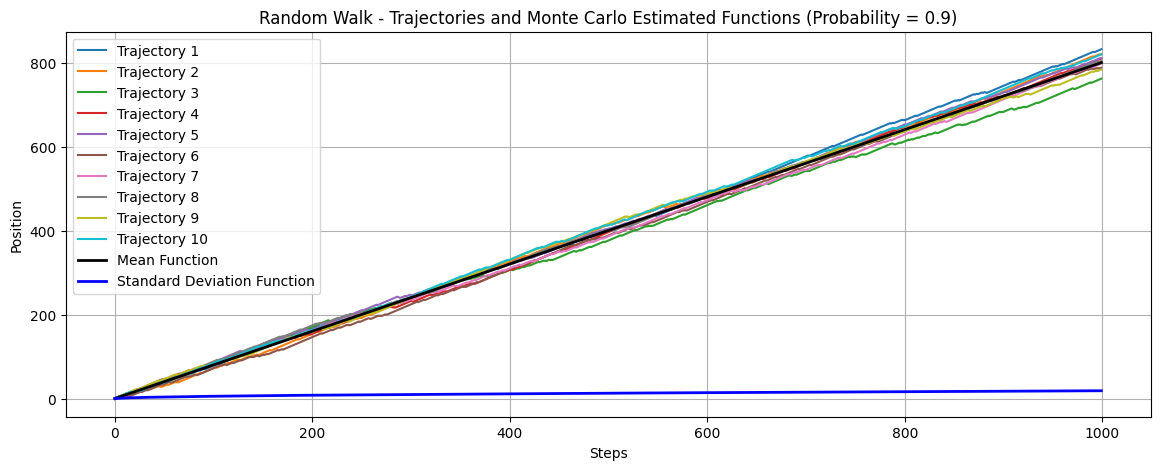

The random walk is a Submartingale.


In [47]:
# Example parameters
probability = round(random.uniform(0, 1), 2)
num_steps = 1_000
initial_position = 0
num_simulations = 10_000

# Call the function
plot_random_walk_trajectories_and_stats(probability, num_steps, initial_position, num_simulations)
result = check_martingale_properties(probability, num_steps)
print(f"The random walk is a {result}.")

In the case of a martingale, the expected value is constant over time. In contrast, for submartingales and supermartingales, the expected value can increase or decrease over time, respectively.

A submartingale has an expected value that increases over time, while a supermartingale has an expected value that decreases over time.